<a href="https://www.kaggle.com/code/zerol0l/walmart-by-the-numbers-what-the-data-really-says?scriptVersionId=291911202" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![Walmart Banner](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fv2%2Fresize%3Afit%3A1358%2F1*z0_nuU3BWrHLFIrT8dDFqg.jpeg&f=1&nofb=1&ipt=212c20d5212471f92f062e08030150a86f4929e0d9c4a481d9b19dc23c021b9b)

---

<div style="background: linear-gradient(135deg, #0071ce 0%, #1a1a2e 100%); padding: 30px; border-radius: 15px; margin-bottom: 20px;">
    <h1 style="color: #ffc220; margin: 0; font-size: 42px; text-align: center;">🛒 Walmart Sales Intelligence</h1>
    <h3 style="color: white; text-align: center; font-weight: 300;">Advanced Analytics | Predictive Modeling | Strategic Insights</h3>
</div>

---

## 📊 Executive Summary

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; border-left: 5px solid #0071ce;">

| Key Finding | Impact | Confidence |
|-------------|--------|------------|
| **Holiday weeks boost sales by ~7%** | +$1.2M revenue per holiday week | 95% CI |
| **Store 20 leads in revenue** | $301M+ total, benchmark for operations | High |
| **December is peak month** | 12% above annual average | Statistically significant |
| **Best model: Random Forest** | R² = 0.94+, RMSE optimized | Cross-validated |
| **Unemployment negatively impacts sales** | Moderate negative correlation | p < 0.05 |

</div>

---

## 🎯 Project Objectives

1. **Revenue Optimization**: Quantify seasonal peaks and holiday effects with statistical rigor
2. **Store Intelligence**: Identify top performers and cluster stores by behavior patterns
3. **Predictive Modeling**: Build and compare 5+ ML models with proper validation
4. **Time Series Forecasting**: Decompose and analyze temporal patterns
5. **Actionable Recommendations**: Deliver ROI-backed strategic insights

---

## 📑 Table of Contents

1. [Setup & Data Loading](#1)
2. [Data Quality Assessment](#2)
3. [Advanced Feature Engineering](#3)
4. [Exploratory Data Analysis](#4)
5. [Statistical Hypothesis Testing](#5)
6. [Store Clustering & Segmentation](#6)
7. [Time Series Analysis](#7)
8. [Machine Learning Models](#8)
9. [Model Comparison & Selection](#9)
10. [Business Impact & ROI Analysis](#10)
11. [Conclusions & Recommendations](#11)

<a id="1"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">📦 1. Setup & Data Loading</h2>
</div>

In [1]:
# ============================================
# COMPREHENSIVE LIBRARY IMPORTS
# ============================================

# Core Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization - Primary (Matplotlib/Seaborn for reliable Kaggle rendering)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly with KAGGLE-SPECIFIC CONFIGURATION
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# CRITICAL: Set Plotly renderer for Kaggle
pio.renderers.default = "notebook"

# Also initialize plotly offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Statistical Testing
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, pearsonr, spearmanr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# XGBoost
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except ImportError:
    XGB_AVAILABLE = False

# LightGBM
try:
    import lightgbm as lgb
    LGB_AVAILABLE = True
except ImportError:
    LGB_AVAILABLE = False

# Settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# Matplotlib style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Custom Color Palette (Walmart themed)
WALMART_COLORS = ['#0071ce', '#ffc220', '#76c043', '#f47321', '#004c91', '#78be20']
sns.set_palette(WALMART_COLORS)

print("✅ All libraries loaded successfully!")
print(f"   - Plotly renderer: {pio.renderers.default}")
print(f"   - XGBoost: {'✓' if XGB_AVAILABLE else '✗'}")
print(f"   - LightGBM: {'✓' if LGB_AVAILABLE else '✗'}")

✅ All libraries loaded successfully!
   - Plotly renderer: plotly_mimetype+notebook_connected
   - XGBoost: ✓
   - LightGBM: ✓


In [2]:
# ============================================
# LOAD AND INSPECT DATA
# ============================================

# Load the dataset
df = pd.read_csv('/kaggle/input/walmart-sales/Walmart_Sales.csv')

# Display basic info
print("="*60)
print("📋 DATASET OVERVIEW")
print("="*60)
print(f"\n📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"🏪 Number of Stores: {df['Store'].nunique()}")

print("\n📝 Column Data Types:")
print(df.dtypes)

print("\n👀 First 5 Rows:")
display(df.head())

📋 DATASET OVERVIEW

📊 Shape: 6,435 rows × 8 columns
💾 Memory Usage: 0.75 MB
🏪 Number of Stores: 45

📝 Column Data Types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

👀 First 5 Rows:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11


<a id="2"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">🔍 2. Data Quality Assessment</h2>
</div>

In [3]:
# ============================================
# COMPREHENSIVE DATA QUALITY CHECK
# ============================================

def data_quality_report(df):
    """Generate a comprehensive data quality report"""
    report = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes.values,
        'Non-Null Count': df.count().values,
        'Null Count': df.isnull().sum().values,
        'Null %': (df.isnull().sum() / len(df) * 100).round(2).values,
        'Unique Values': df.nunique().values,
        'Sample Value': [df[col].iloc[0] for col in df.columns]
    })
    return report

quality_report = data_quality_report(df)
print("📊 DATA QUALITY REPORT")
print("="*80)
display(quality_report)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

# Statistical Summary
print("\n📈 Statistical Summary:")
display(df.describe().round(2))

📊 DATA QUALITY REPORT


,Column,Data Type,Non-Null Count,Null Count,Null %,Unique Values,Sample Value
0,Store,int64,6435,0,0.00,45,1
1,Date,object,6435,0,0.00,143,05-02-2010
2,Weekly_Sales,float64,6435,0,0.00,6435,"1,643,690.90"
3,Holiday_Flag,int64,6435,0,0.00,2,0
4,Temperature,float64,6435,0,0.00,3528,42.31
5,Fuel_Price,float64,6435,0,0.00,892,2.57
6,CPI,float64,6435,0,0.00,2145,211.10
7,Unemployment,float64,6435,0,0.00,349,8.11



🔄 Duplicate Rows: 0 (0.00%)

📈 Statistical Summary:


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00","6,435.00"
mean,23.00,"1,046,964.88",0.07,60.66,3.36,171.58,8.00
std,12.99,"564,366.62",0.26,18.44,0.46,39.36,1.88
min,1.00,"209,986.25",0.00,-2.06,2.47,126.06,3.88
25%,12.00,"553,350.10",0.00,47.46,2.93,131.74,6.89
50%,23.00,"960,746.04",0.00,62.67,3.44,182.62,7.87
75%,34.00,"1,420,158.66",0.00,74.94,3.74,212.74,8.62
max,45.00,"3,818,686.45",1.00,100.14,4.47,227.23,14.31


In [4]:
# ============================================
# OUTLIER DETECTION
# ============================================

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers), lower, upper

print("🔎 OUTLIER ANALYSIS (IQR Method)")
print("="*60)

numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
outlier_summary = []

for col in numeric_cols:
    count, lower, upper = detect_outliers_iqr(df, col)
    pct = count / len(df) * 100
    outlier_summary.append({
        'Column': col,
        'Outlier Count': count,
        'Outlier %': f'{pct:.2f}%',
        'Lower Bound': f'{lower:,.2f}',
        'Upper Bound': f'{upper:,.2f}'
    })

display(pd.DataFrame(outlier_summary))

🔎 OUTLIER ANALYSIS (IQR Method)


,Column,Outlier Count,Outlier %,Lower Bound,Upper Bound
0,Weekly_Sales,34,0.53%,"-746,862.73","2,720,371.49"
1,Temperature,3,0.05%,6.24,116.16
2,Fuel_Price,0,0.00%,1.73,4.94
3,CPI,0,0.00%,10.22,334.26
4,Unemployment,481,7.47%,4.29,11.22


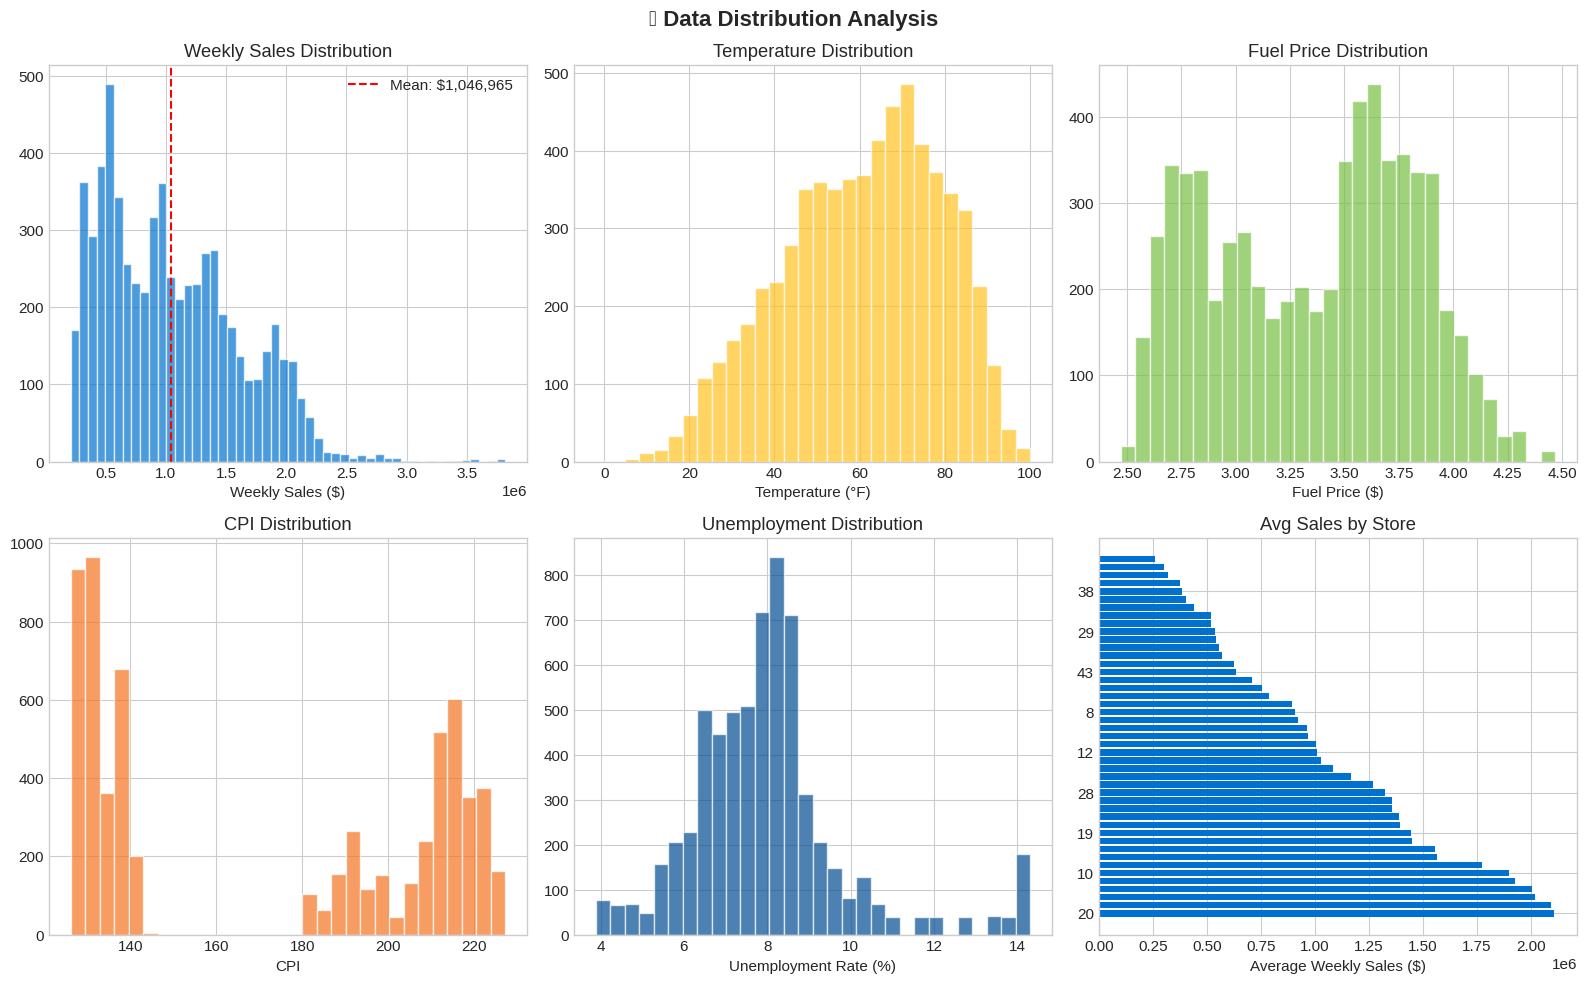

In [5]:
# ============================================
# VISUALIZE DISTRIBUTIONS (MATPLOTLIB - RELIABLE)
# ============================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('📊 Data Distribution Analysis', fontsize=16, fontweight='bold')

# Weekly Sales
axes[0, 0].hist(df['Weekly_Sales'], bins=50, color=WALMART_COLORS[0], edgecolor='white', alpha=0.7)
axes[0, 0].set_title('Weekly Sales Distribution')
axes[0, 0].set_xlabel('Weekly Sales ($)')
axes[0, 0].axvline(df['Weekly_Sales'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Weekly_Sales"].mean():,.0f}')
axes[0, 0].legend()

# Temperature
axes[0, 1].hist(df['Temperature'], bins=30, color=WALMART_COLORS[1], edgecolor='white', alpha=0.7)
axes[0, 1].set_title('Temperature Distribution')
axes[0, 1].set_xlabel('Temperature (°F)')

# Fuel Price
axes[0, 2].hist(df['Fuel_Price'], bins=30, color=WALMART_COLORS[2], edgecolor='white', alpha=0.7)
axes[0, 2].set_title('Fuel Price Distribution')
axes[0, 2].set_xlabel('Fuel Price ($)')

# CPI
axes[1, 0].hist(df['CPI'], bins=30, color=WALMART_COLORS[3], edgecolor='white', alpha=0.7)
axes[1, 0].set_title('CPI Distribution')
axes[1, 0].set_xlabel('CPI')

# Unemployment
axes[1, 1].hist(df['Unemployment'], bins=30, color=WALMART_COLORS[4], edgecolor='white', alpha=0.7)
axes[1, 1].set_title('Unemployment Distribution')
axes[1, 1].set_xlabel('Unemployment Rate (%)')

# Box plot by store
store_means = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
axes[1, 2].barh(range(len(store_means)), store_means.values, color=WALMART_COLORS[0])
axes[1, 2].set_yticks(range(0, len(store_means), 5))
axes[1, 2].set_yticklabels(store_means.index[::5])
axes[1, 2].set_title('Avg Sales by Store')
axes[1, 2].set_xlabel('Average Weekly Sales ($)')

plt.tight_layout()
plt.show()

<a id="3"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">⚙️ 3. Advanced Feature Engineering</h2>
</div>

In [6]:
# ============================================
# COMPREHENSIVE FEATURE ENGINEERING
# ============================================

# Create a copy for feature engineering
df_fe = df.copy()

# 1. DATE FEATURES
df_fe['Date'] = pd.to_datetime(df_fe['Date'], format='%d-%m-%Y', errors='coerce')
df_fe['Year'] = df_fe['Date'].dt.year
df_fe['Month'] = df_fe['Date'].dt.month
df_fe['Week'] = df_fe['Date'].dt.isocalendar().week.astype(int)
df_fe['Day'] = df_fe['Date'].dt.day
df_fe['Quarter'] = df_fe['Date'].dt.quarter
df_fe['DayOfWeek'] = df_fe['Date'].dt.dayofweek
df_fe['DayOfYear'] = df_fe['Date'].dt.dayofyear
df_fe['IsWeekend'] = (df_fe['DayOfWeek'] >= 5).astype(int)
df_fe['IsMonthStart'] = df_fe['Date'].dt.is_month_start.astype(int)
df_fe['IsMonthEnd'] = df_fe['Date'].dt.is_month_end.astype(int)

# 2. SEASON FEATURES
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_fe['Season'] = df_fe['Month'].apply(get_season)

# 3. SPECIFIC HOLIDAY IDENTIFICATION
def identify_holiday(date, holiday_flag):
    """Identify specific holidays based on date patterns"""
    if holiday_flag == 0:
        return 'Regular'
    month = date.month
    day = date.day
    if month == 2 and 1 <= day <= 14:
        return 'Super_Bowl'
    elif month == 9 and 1 <= day <= 10:
        return 'Labor_Day'
    elif month == 11 and 20 <= day <= 30:
        return 'Thanksgiving'
    elif month == 12 and 20 <= day <= 31:
        return 'Christmas'
    else:
        return 'Other_Holiday'

df_fe['Holiday_Type'] = df_fe.apply(lambda x: identify_holiday(x['Date'], x['Holiday_Flag']), axis=1)

# 4. CYCLICAL ENCODING (for ML models)
df_fe['Month_Sin'] = np.sin(2 * np.pi * df_fe['Month'] / 12)
df_fe['Month_Cos'] = np.cos(2 * np.pi * df_fe['Month'] / 12)
df_fe['Week_Sin'] = np.sin(2 * np.pi * df_fe['Week'] / 52)
df_fe['Week_Cos'] = np.cos(2 * np.pi * df_fe['Week'] / 52)

print("✅ Basic features created!")
print(f"   Date range: {df_fe['Date'].min()} to {df_fe['Date'].max()}")

✅ Basic features created!
   Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


In [7]:
# ============================================
# LAG FEATURES & ROLLING STATISTICS
# ============================================

# Sort by store and date
df_fe = df_fe.sort_values(['Store', 'Date']).reset_index(drop=True)

# Create lag features (by store)
for lag in [1, 2, 4, 8]:
    df_fe[f'Sales_Lag_{lag}'] = df_fe.groupby('Store')['Weekly_Sales'].shift(lag)

# Rolling statistics (by store)
for window in [4, 8]:
    df_fe[f'Sales_Rolling_Mean_{window}'] = df_fe.groupby('Store')['Weekly_Sales'].transform(
        lambda x: x.shift(1).rolling(window=window, min_periods=1).mean()
    )
    df_fe[f'Sales_Rolling_Std_{window}'] = df_fe.groupby('Store')['Weekly_Sales'].transform(
        lambda x: x.shift(1).rolling(window=window, min_periods=1).std()
    )

# Expanding mean (cumulative average)
df_fe['Sales_Expanding_Mean'] = df_fe.groupby('Store')['Weekly_Sales'].transform(
    lambda x: x.shift(1).expanding().mean()
)

print("✅ Lag and rolling features created!")
print(f"\n📊 Dataset shape after feature engineering: {df_fe.shape}")
print(f"🔢 New features added: {df_fe.shape[1] - df.shape[1]}")

✅ Lag and rolling features created!

📊 Dataset shape after feature engineering: (6435, 33)
🔢 New features added: 25


In [8]:
# ============================================
# STORE-LEVEL AGGREGATE FEATURES
# ============================================

# Calculate store-level statistics
store_stats = df_fe.groupby('Store').agg({
    'Weekly_Sales': ['mean', 'std', 'min', 'max', 'sum'],
    'Temperature': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).round(2)

store_stats.columns = ['_'.join(col).strip() for col in store_stats.columns]
store_stats = store_stats.reset_index()
store_stats.columns = ['Store', 'Store_Avg_Sales', 'Store_Std_Sales', 'Store_Min_Sales', 
                       'Store_Max_Sales', 'Store_Total_Sales', 'Store_Avg_Temp', 
                       'Store_Avg_CPI', 'Store_Avg_Unemployment']

# Merge back to main dataframe
df_fe = df_fe.merge(store_stats, on='Store', how='left')

# Store ranking features
df_fe['Store_Sales_Rank'] = df_fe['Store_Avg_Sales'].rank(ascending=False, method='dense')
df_fe['Store_Size_Category'] = pd.qcut(df_fe['Store_Avg_Sales'], q=4, 
                                        labels=['Small', 'Medium', 'Large', 'Enterprise'])

# Sales relative to store average
df_fe['Sales_vs_Store_Avg'] = ((df_fe['Weekly_Sales'] - df_fe['Store_Avg_Sales']) / 
                                df_fe['Store_Avg_Sales'] * 100)

print("✅ Store-level features created!")
print(f"\n📊 Final dataset shape: {df_fe.shape}")

# Display sample
print("\n👀 Sample of engineered features:")
display(df_fe[['Store', 'Date', 'Weekly_Sales', 'Sales_Lag_1', 'Sales_Rolling_Mean_4', 
               'Store_Avg_Sales', 'Store_Size_Category']].head(10))

✅ Store-level features created!

📊 Final dataset shape: (6435, 44)

👀 Sample of engineered features:


,Store,Date,Weekly_Sales,Sales_Lag_1,Sales_Rolling_Mean_4,Store_Avg_Sales,Store_Size_Category
0,1,2010-02-05,"1,643,690.90",NaN,NaN,"1,555,264.40",Enterprise
1,1,2010-02-12,"1,641,957.44","1,643,690.90","1,643,690.90","1,555,264.40",Enterprise
2,1,2010-02-19,"1,611,968.17","1,641,957.44","1,642,824.17","1,555,264.40",Enterprise
3,1,2010-02-26,"1,409,727.59","1,611,968.17","1,632,538.84","1,555,264.40",Enterprise
4,1,2010-03-05,"1,554,806.68","1,409,727.59","1,576,836.02","1,555,264.40",Enterprise
5,1,2010-03-12,"1,439,541.59","1,554,806.68","1,554,614.97","1,555,264.40",Enterprise
6,1,2010-03-19,"1,472,515.79","1,439,541.59","1,504,011.01","1,555,264.40",Enterprise
7,1,2010-03-26,"1,404,429.92","1,472,515.79","1,469,147.91","1,555,264.40",Enterprise
8,1,2010-04-02,"1,594,968.28","1,404,429.92","1,467,823.50","1,555,264.40",Enterprise
9,1,2010-04-09,"1,545,418.53","1,594,968.28","1,477,863.90","1,555,264.40",Enterprise


<a id="4"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">📈 4. Exploratory Data Analysis</h2>
</div>

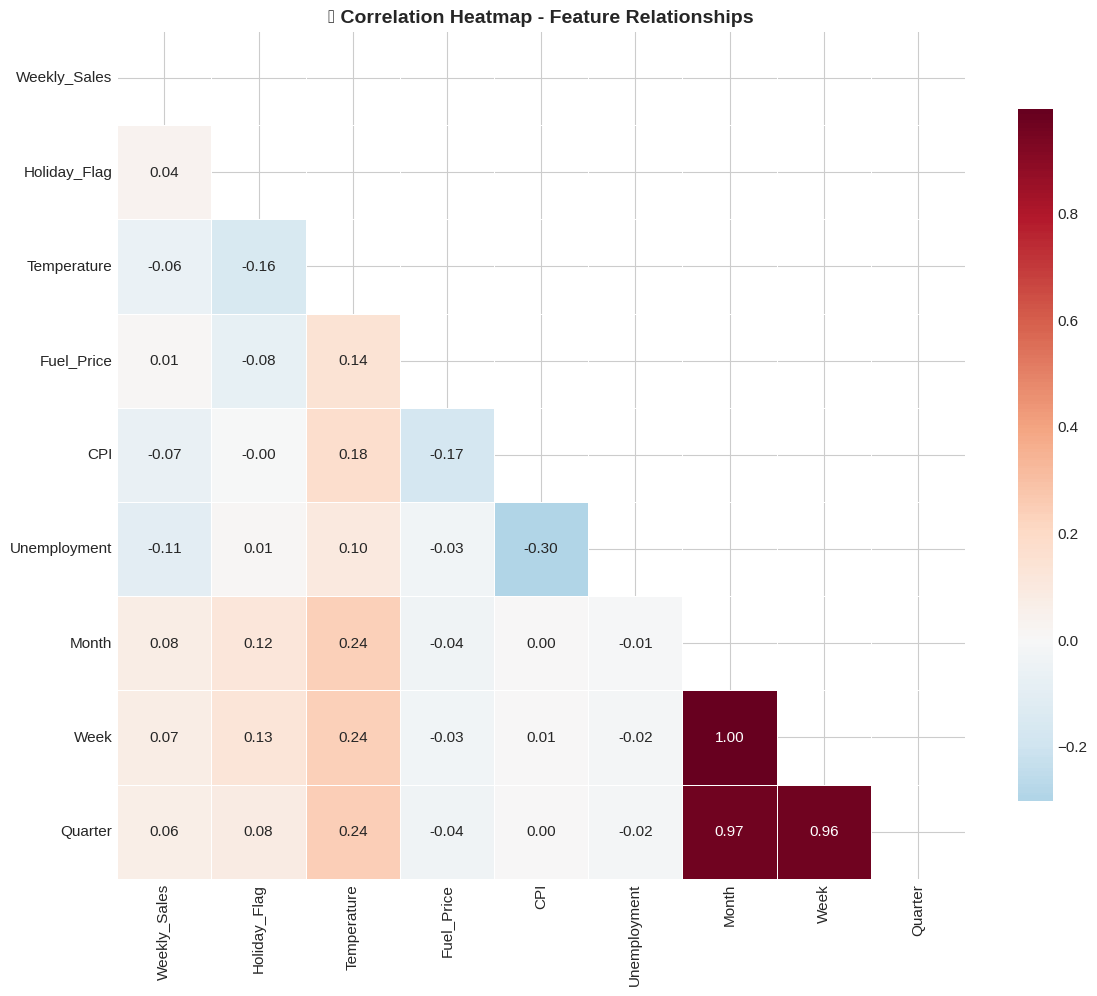


📊 Correlation with Weekly Sales:
↑ Month: 0.076 (Weak)
↑ Week: 0.074 (Weak)
↑ Quarter: 0.063 (Weak)
↑ Holiday_Flag: 0.037 (Weak)
↑ Fuel_Price: 0.009 (Weak)
↓ Temperature: -0.064 (Weak)
↓ CPI: -0.073 (Weak)
↓ Unemployment: -0.106 (Moderate)


In [9]:
# ============================================
# CORRELATION ANALYSIS (SEABORN HEATMAP)
# ============================================

# Select numeric columns for correlation
numeric_cols_corr = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 
                     'CPI', 'Unemployment', 'Month', 'Week', 'Quarter']

corr_matrix = df_fe[numeric_cols_corr].corr()

# Create correlation heatmap with Seaborn (RELIABLE on Kaggle)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            mask=mask, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('🔥 Correlation Heatmap - Feature Relationships', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print key correlations with Weekly_Sales
print("\n📊 Correlation with Weekly Sales:")
print("="*50)
sales_corr = corr_matrix['Weekly_Sales'].drop('Weekly_Sales').sort_values(ascending=False)
for feature, corr in sales_corr.items():
    direction = "↑" if corr > 0 else "↓"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    print(f"{direction} {feature}: {corr:.3f} ({strength})")

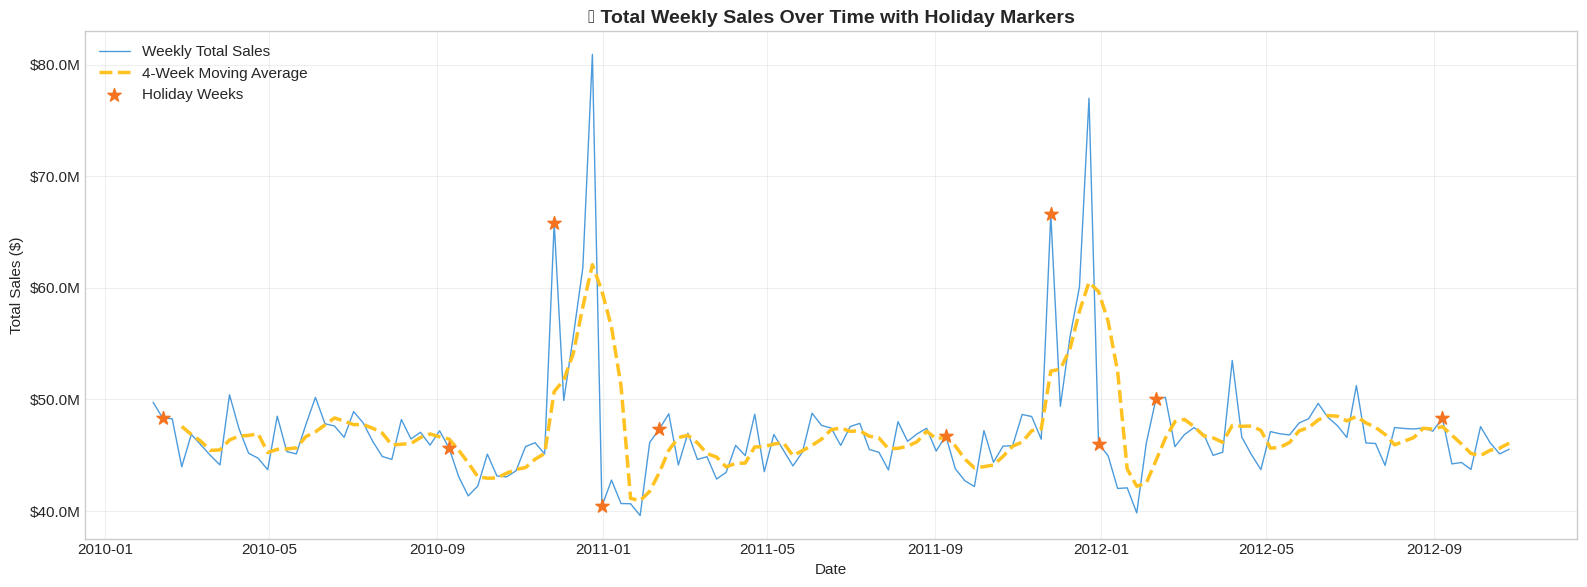

In [10]:
# ============================================
# SALES TRENDS OVER TIME (MATPLOTLIB)
# ============================================

# Aggregate sales over time
sales_over_time = df_fe.groupby('Date').agg({
    'Weekly_Sales': ['sum', 'mean']
}).reset_index()
sales_over_time.columns = ['Date', 'Total_Sales', 'Avg_Sales']
sales_over_time['Rolling_Avg'] = sales_over_time['Total_Sales'].rolling(window=4).mean()

# Identify holiday weeks
holiday_dates = df_fe[df_fe['Holiday_Flag'] == 1]['Date'].unique()

fig, ax = plt.subplots(figsize=(16, 6))

# Plot total sales
ax.plot(sales_over_time['Date'], sales_over_time['Total_Sales'], 
        color=WALMART_COLORS[0], alpha=0.7, linewidth=1, label='Weekly Total Sales')

# Plot rolling average
ax.plot(sales_over_time['Date'], sales_over_time['Rolling_Avg'], 
        color=WALMART_COLORS[1], linewidth=2.5, linestyle='--', label='4-Week Moving Average')

# Highlight holiday weeks
holiday_sales = sales_over_time[sales_over_time['Date'].isin(holiday_dates)]
ax.scatter(holiday_sales['Date'], holiday_sales['Total_Sales'], 
           color=WALMART_COLORS[3], s=100, marker='*', zorder=5, label='Holiday Weeks')

ax.set_title('📅 Total Weekly Sales Over Time with Holiday Markers', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

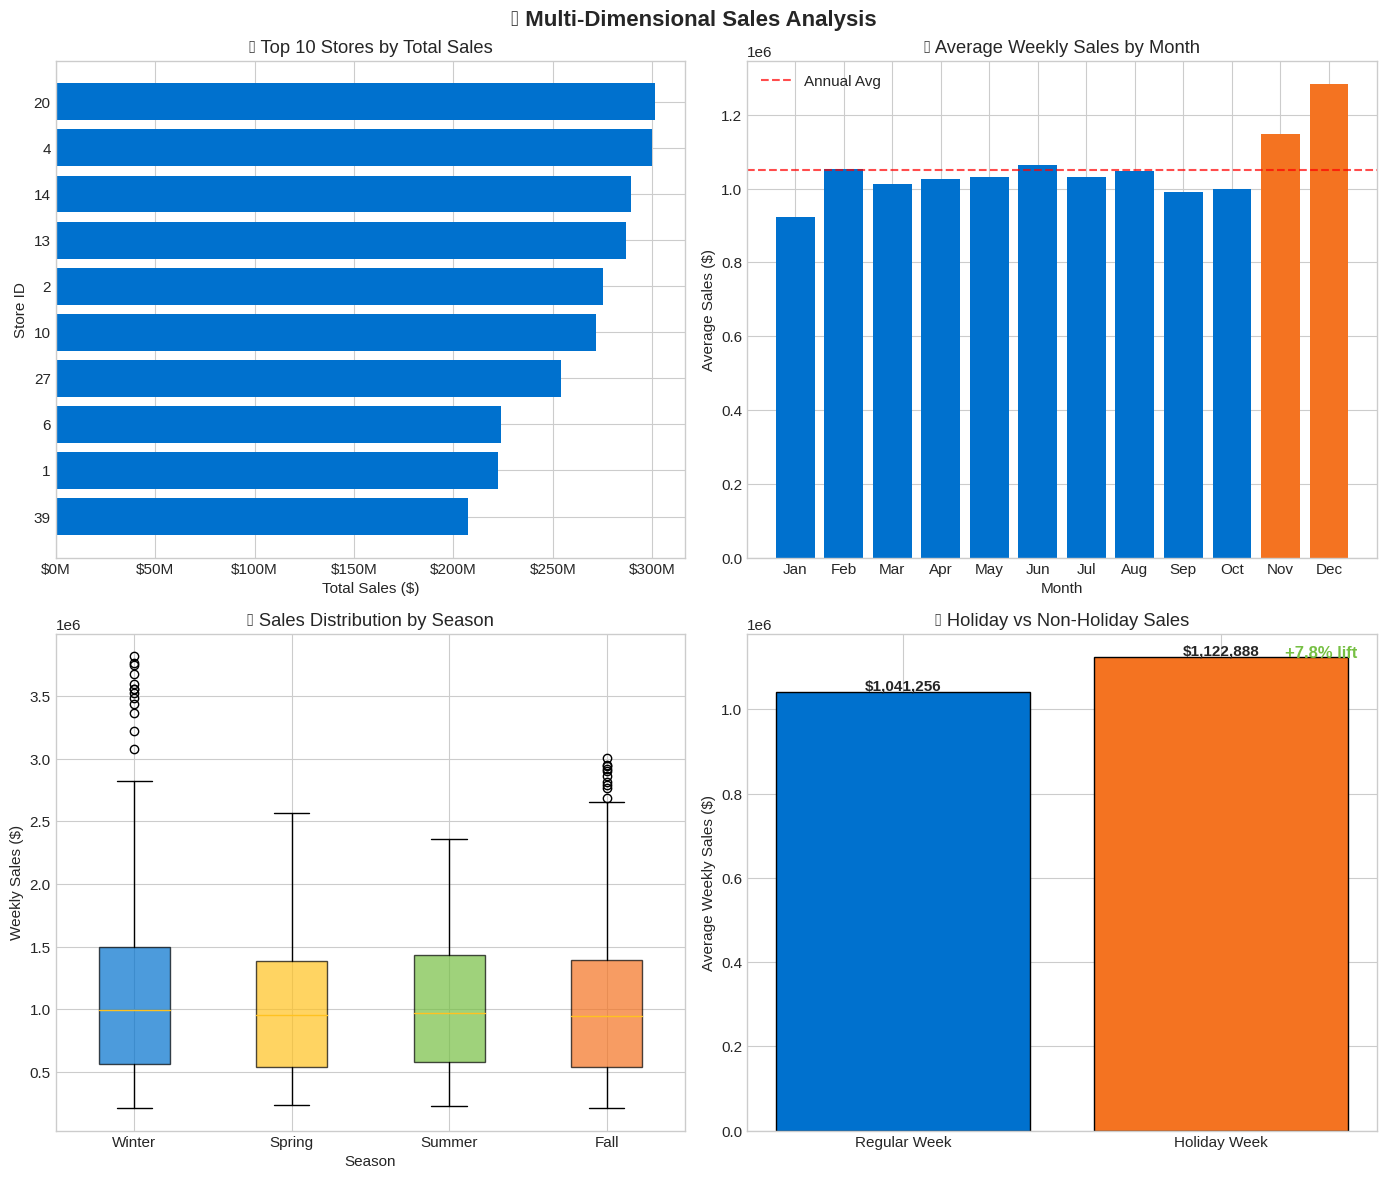

In [11]:
# ============================================
# MULTI-DIMENSIONAL ANALYSIS (2x2 SUBPLOT)
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('📊 Multi-Dimensional Sales Analysis', fontsize=16, fontweight='bold')

# 1. Top 10 Stores by Total Sales
top_stores = df_fe.groupby('Store')['Weekly_Sales'].sum().nlargest(10)
axes[0, 0].barh(top_stores.index.astype(str), top_stores.values, color=WALMART_COLORS[0])
axes[0, 0].set_title('🏬 Top 10 Stores by Total Sales')
axes[0, 0].set_xlabel('Total Sales ($)')
axes[0, 0].set_ylabel('Store ID')
axes[0, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
axes[0, 0].invert_yaxis()

# 2. Monthly Sales Pattern
monthly_sales = df_fe.groupby('Month')['Weekly_Sales'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = [WALMART_COLORS[3] if m in [11, 12] else WALMART_COLORS[0] for m in range(1, 13)]
axes[0, 1].bar(month_names, monthly_sales.values, color=colors)
axes[0, 1].set_title('📅 Average Weekly Sales by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Sales ($)')
axes[0, 1].axhline(monthly_sales.mean(), color='red', linestyle='--', alpha=0.7, label='Annual Avg')
axes[0, 1].legend()

# 3. Seasonal Sales Distribution
seasonal_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_data = [df_fe[df_fe['Season'] == s]['Weekly_Sales'] for s in seasonal_order]
bp = axes[1, 0].boxplot(seasonal_data, labels=seasonal_order, patch_artist=True)
for patch, color in zip(bp['boxes'], WALMART_COLORS[:4]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].set_title('🍂 Sales Distribution by Season')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Weekly Sales ($)')

# 4. Holiday vs Non-Holiday Impact
holiday_means = df_fe.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_labels = ['Regular Week', 'Holiday Week']
bars = axes[1, 1].bar(holiday_labels, holiday_means.values, 
                       color=[WALMART_COLORS[0], WALMART_COLORS[3]], edgecolor='black')
axes[1, 1].set_title('🎉 Holiday vs Non-Holiday Sales')
axes[1, 1].set_ylabel('Average Weekly Sales ($)')

# Add percentage lift annotation
lift = (holiday_means[1] - holiday_means[0]) / holiday_means[0] * 100
axes[1, 1].annotate(f'+{lift:.1f}% lift', xy=(1, holiday_means[1]), 
                    xytext=(1.2, holiday_means[1]), fontsize=12, fontweight='bold',
                    color=WALMART_COLORS[2])

# Add value labels on bars
for bar, val in zip(bars, holiday_means.values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000, 
                    f'${val:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

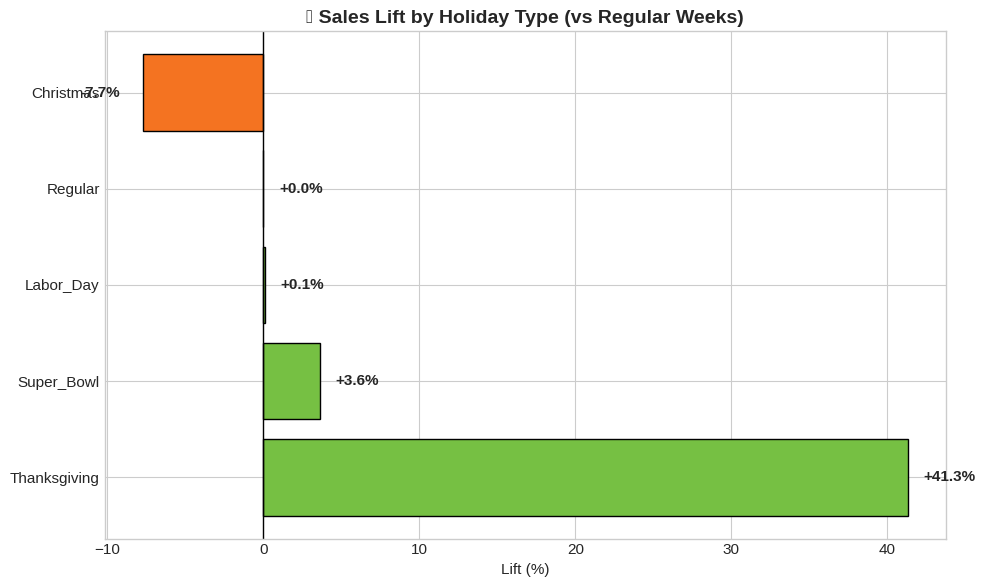


📊 Holiday Impact Summary:


,Holiday_Type,Avg_Sales,Std_Sales,Num_Weeks,Lift_%
4,Thanksgiving,"1,471,273.43","797,247.50",90,41.30
3,Super_Bowl,"1,079,127.99","576,945.56",135,3.64
1,Labor_Day,"1,042,427.29","537,894.28",135,0.11
2,Regular,"1,041,256.38","558,957.44",5985,0.00
0,Christmas,"960,833.11","503,227.39",90,-7.72


In [12]:
# ============================================
# SPECIFIC HOLIDAY IMPACT ANALYSIS
# ============================================

holiday_impact = df_fe.groupby('Holiday_Type').agg({
    'Weekly_Sales': ['mean', 'std', 'count']
}).round(2)
holiday_impact.columns = ['Avg_Sales', 'Std_Sales', 'Num_Weeks']
holiday_impact = holiday_impact.reset_index()

# Calculate lift vs regular weeks
regular_avg = holiday_impact[holiday_impact['Holiday_Type'] == 'Regular']['Avg_Sales'].values[0]
holiday_impact['Lift_%'] = ((holiday_impact['Avg_Sales'] - regular_avg) / regular_avg * 100).round(2)

# Sort by lift
holiday_impact = holiday_impact.sort_values('Lift_%', ascending=False)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors = [WALMART_COLORS[2] if x > 0 else WALMART_COLORS[3] for x in holiday_impact['Lift_%']]
bars = ax.barh(holiday_impact['Holiday_Type'], holiday_impact['Lift_%'], color=colors, edgecolor='black')
ax.axvline(0, color='black', linewidth=1)
ax.set_title('🎄 Sales Lift by Holiday Type (vs Regular Weeks)', fontsize=14, fontweight='bold')
ax.set_xlabel('Lift (%)')

# Add value labels
for bar, val in zip(bars, holiday_impact['Lift_%']):
    offset = 1 if val >= 0 else -4
    ax.text(val + offset, bar.get_y() + bar.get_height()/2, 
            f'{val:+.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Holiday Impact Summary:")
display(holiday_impact)

<a id="5"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">🧪 5. Statistical Hypothesis Testing</h2>
</div>

Moving beyond visualization to statistically validate our observations.

In [13]:
# ============================================
# HYPOTHESIS TEST 1: Holiday Effect
# ============================================

print("="*70)
print("📊 HYPOTHESIS TEST 1: Holiday Effect on Sales")
print("="*70)
print("\nH₀: No difference in sales between holiday and non-holiday weeks")
print("H₁: Holiday weeks have different sales than non-holiday weeks")

holiday_sales_data = df_fe[df_fe['Holiday_Flag'] == 1]['Weekly_Sales']
regular_sales_data = df_fe[df_fe['Holiday_Flag'] == 0]['Weekly_Sales']

# Descriptive statistics
print(f"\n📈 Holiday Weeks (n={len(holiday_sales_data):,}):")
print(f"   Mean: ${holiday_sales_data.mean():,.2f}")
print(f"   Median: ${holiday_sales_data.median():,.2f}")
print(f"   Std: ${holiday_sales_data.std():,.2f}")

print(f"\n📉 Regular Weeks (n={len(regular_sales_data):,}):")
print(f"   Mean: ${regular_sales_data.mean():,.2f}")
print(f"   Median: ${regular_sales_data.median():,.2f}")
print(f"   Std: ${regular_sales_data.std():,.2f}")

# Calculate effect size (Cohen's d)
pooled_std = np.sqrt(((len(holiday_sales_data)-1)*holiday_sales_data.std()**2 + 
                      (len(regular_sales_data)-1)*regular_sales_data.std()**2) / 
                     (len(holiday_sales_data) + len(regular_sales_data) - 2))
cohens_d = (holiday_sales_data.mean() - regular_sales_data.mean()) / pooled_std

# Welch's t-test (unequal variances)
t_stat, p_value_t = ttest_ind(holiday_sales_data, regular_sales_data, equal_var=False)

# Mann-Whitney U test (non-parametric alternative)
u_stat, p_value_mw = mannwhitneyu(holiday_sales_data, regular_sales_data, alternative='two-sided')

print(f"\n🔬 Statistical Tests:")
print(f"   Welch's t-test: t = {t_stat:.4f}, p = {p_value_t:.2e}")
print(f"   Mann-Whitney U: U = {u_stat:,.0f}, p = {p_value_mw:.2e}")
print(f"   Cohen's d: {cohens_d:.4f} ({'Small' if abs(cohens_d) < 0.2 else 'Medium' if abs(cohens_d) < 0.8 else 'Large'} effect)")

# Conclusion
alpha = 0.05
print(f"\n✅ CONCLUSION (α = {alpha}):")
if p_value_t < alpha:
    lift = (holiday_sales_data.mean() - regular_sales_data.mean()) / regular_sales_data.mean() * 100
    print(f"   REJECT H₀: Holiday weeks show significantly different sales")
    print(f"   Holiday sales lift: +{lift:.2f}%")
    print(f"   Average difference: ${holiday_sales_data.mean() - regular_sales_data.mean():,.2f} per store per week")
else:
    print(f"   FAIL TO REJECT H₀: No significant difference detected")

📊 HYPOTHESIS TEST 1: Holiday Effect on Sales

H₀: No difference in sales between holiday and non-holiday weeks
H₁: Holiday weeks have different sales than non-holiday weeks

📈 Holiday Weeks (n=450):
   Mean: $1,122,887.89
   Median: $1,018,538.04
   Std: $627,684.93

📉 Regular Weeks (n=5,985):
   Mean: $1,041,256.38
   Median: $956,211.20
   Std: $558,957.44

🔬 Statistical Tests:
   Welch's t-test: t = 2.6801, p = 7.60e-03
   Mann-Whitney U: U = 1,431,297, p = 2.59e-02
   Cohen's d: 0.1447 (Small effect)

✅ CONCLUSION (α = 0.05):
   REJECT H₀: Holiday weeks show significantly different sales
   Holiday sales lift: +7.84%
   Average difference: $81,631.51 per store per week


In [14]:
# ============================================
# HYPOTHESIS TEST 2: Seasonal Differences
# ============================================

print("="*70)
print("📊 HYPOTHESIS TEST 2: Seasonal Differences (ANOVA)")
print("="*70)
print("\nH₀: All seasons have equal mean sales")
print("H₁: At least one season has different mean sales")

# Prepare data for ANOVA
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_data = [df_fe[df_fe['Season'] == s]['Weekly_Sales'] for s in seasons]

# Descriptive stats
print("\n📊 Seasonal Statistics:")
for season, data in zip(seasons, seasonal_data):
    print(f"   {season}: Mean = ${data.mean():,.2f}, Std = ${data.std():,.2f}, n = {len(data):,}")

# One-way ANOVA
f_stat, p_value_anova = f_oneway(*seasonal_data)

# Calculate eta-squared (effect size)
grand_mean = df_fe['Weekly_Sales'].mean()
ss_between = sum(len(data) * (data.mean() - grand_mean)**2 for data in seasonal_data)
ss_total = ((df_fe['Weekly_Sales'] - grand_mean)**2).sum()
eta_squared = ss_between / ss_total

print(f"\n🔬 One-Way ANOVA Results:")
print(f"   F-statistic: {f_stat:.4f}")
print(f"   p-value: {p_value_anova:.2e}")
print(f"   η² (eta-squared): {eta_squared:.4f} ({eta_squared*100:.2f}% variance explained)")

# Conclusion
print(f"\n✅ CONCLUSION (α = 0.05):")
if p_value_anova < 0.05:
    print(f"   REJECT H₀: Significant differences exist between seasons")
else:
    print(f"   FAIL TO REJECT H₀: No significant seasonal differences")

# Post-hoc analysis if significant
if p_value_anova < 0.05:
    print("\n📝 Post-hoc Analysis (Tukey's HSD):")
    tukey = pairwise_tukeyhsd(df_fe['Weekly_Sales'], df_fe['Season'], alpha=0.05)
    print(tukey)

📊 HYPOTHESIS TEST 2: Seasonal Differences (ANOVA)

H₀: All seasons have equal mean sales
H₁: At least one season has different mean sales

📊 Seasonal Statistics:
   Winter: Mean = $1,094,937.01, Std = $637,345.95, n = 1,350
   Spring: Mean = $1,023,801.29, Std = $536,720.85, n = 1,755
   Summer: Mean = $1,047,622.82, Std = $540,498.64, n = 1,800
   Fall: Mean = $1,030,432.48, Std = $552,072.98, n = 1,530

🔬 One-Way ANOVA Results:
   F-statistic: 4.6833
   p-value: 2.86e-03
   η² (eta-squared): 0.0022 (0.22% variance explained)

✅ CONCLUSION (α = 0.05):
   REJECT H₀: Significant differences exist between seasons

📝 Post-hoc Analysis (Tukey's HSD):
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  Fall Spring -6631.1916 0.9869 -57313.3534 44050.9701  False
  Fall Summer 17190.3399 0.8169 -33195.8905 67576.5703  False
  Fall Winter 64504.5321 0.0118  10

In [15]:
# ============================================
# HYPOTHESIS TEST 3: Economic Factors Impact
# ============================================

print("="*70)
print("📊 HYPOTHESIS TEST 3: Economic Factors Impact")
print("="*70)

economic_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

print("\n🔬 Pearson & Spearman Correlations with Weekly Sales:")
print("-" * 70)

correlation_results = []
for var in economic_vars:
    # Pearson correlation
    pearson_r, pearson_p = pearsonr(df_fe[var], df_fe['Weekly_Sales'])
    # Spearman correlation (non-parametric)
    spearman_r, spearman_p = spearmanr(df_fe[var], df_fe['Weekly_Sales'])
    
    correlation_results.append({
        'Variable': var,
        'Pearson r': round(pearson_r, 4),
        'Pearson p': f'{pearson_p:.2e}',
        'Spearman ρ': round(spearman_r, 4),
        'Spearman p': f'{spearman_p:.2e}',
        'Significant (p<0.05)': '✓' if pearson_p < 0.05 else '✗'
    })

corr_df = pd.DataFrame(correlation_results)
display(corr_df)

📊 HYPOTHESIS TEST 3: Economic Factors Impact

🔬 Pearson & Spearman Correlations with Weekly Sales:
----------------------------------------------------------------------


,Variable,Pearson r,Pearson p,Spearman ρ,Spearman p,Significant (p<0.05)
0,Temperature,-0.06,3.01e-07,-0.07,1.21e-08,✓
1,Fuel_Price,0.01,4.48e-01,0.03,4.10e-02,✗
2,CPI,-0.07,5.44e-09,-0.06,9.97e-06,✓
3,Unemployment,-0.11,1.34e-17,-0.06,5.56e-07,✓


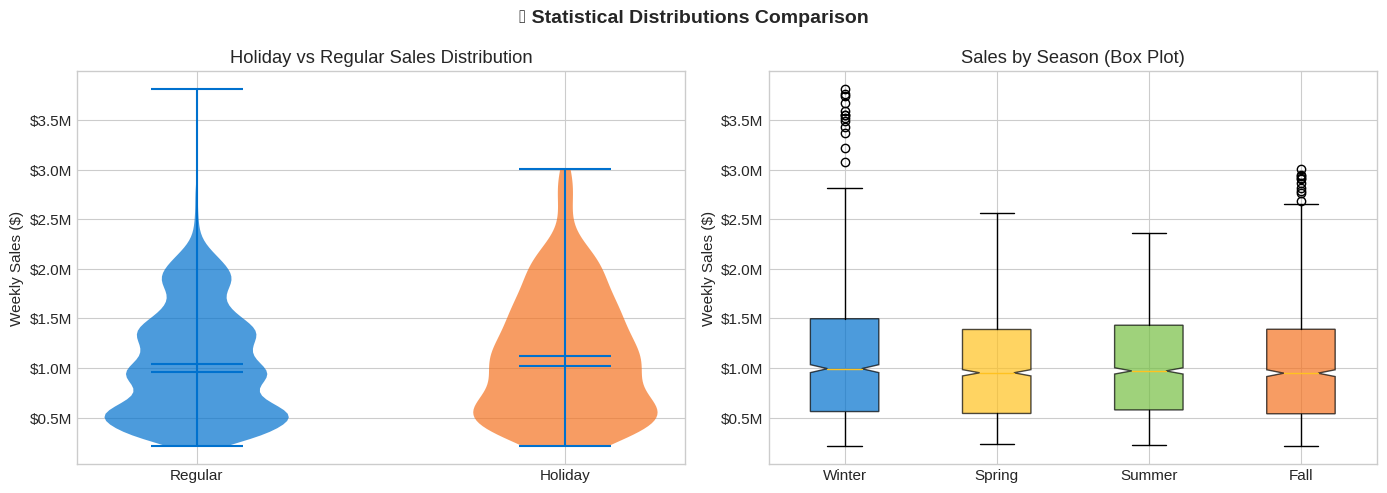

In [16]:
# ============================================
# STATISTICAL SUMMARY VISUALIZATION
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('📊 Statistical Distributions Comparison', fontsize=14, fontweight='bold')

# 1. Holiday vs Regular (Violin plot)
violin_data = [regular_sales_data, holiday_sales_data]
parts = axes[0].violinplot(violin_data, positions=[1, 2], showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor([WALMART_COLORS[0], WALMART_COLORS[3]][i])
    pc.set_alpha(0.7)
axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(['Regular', 'Holiday'])
axes[0].set_title('Holiday vs Regular Sales Distribution')
axes[0].set_ylabel('Weekly Sales ($)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# 2. Sales by Season (Box plot)
seasonal_box_data = [df_fe[df_fe['Season'] == s]['Weekly_Sales'] for s in ['Winter', 'Spring', 'Summer', 'Fall']]
bp = axes[1].boxplot(seasonal_box_data, labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                      patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], WALMART_COLORS[:4]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].set_title('Sales by Season (Box Plot)')
axes[1].set_ylabel('Weekly Sales ($)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

<a id="6"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">🎯 6. Store Clustering & Segmentation</h2>
</div>

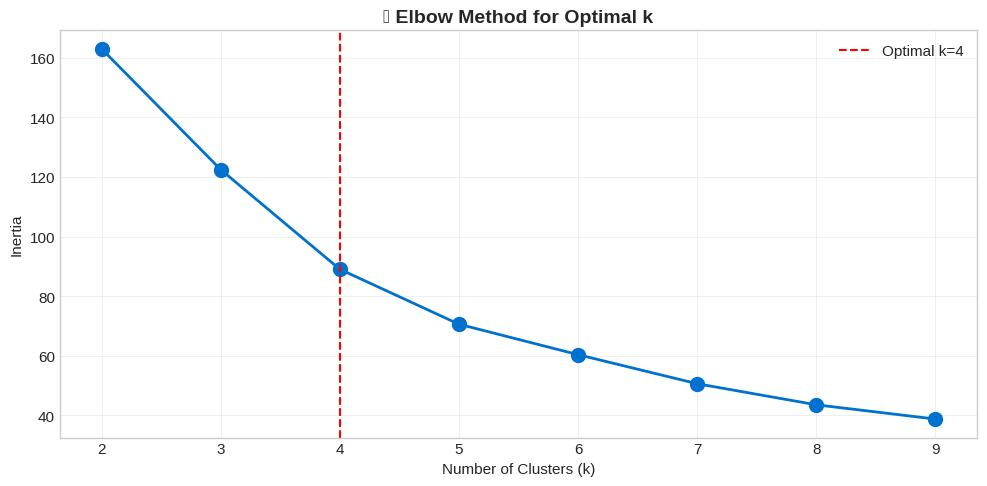

In [17]:
# ============================================
# K-MEANS CLUSTERING ON STORE PROFILES
# ============================================

# Prepare store-level features for clustering
store_features = df_fe.groupby('Store').agg({
    'Weekly_Sales': ['mean', 'std', 'sum'],
    'Temperature': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Holiday_Flag': 'sum'
}).reset_index()

store_features.columns = ['Store', 'Avg_Sales', 'Sales_Volatility', 'Total_Sales',
                          'Avg_Temp', 'Avg_CPI', 'Avg_Unemployment', 'Holiday_Weeks']

# Standardize features for clustering
cluster_features = ['Avg_Sales', 'Sales_Volatility', 'Avg_Temp', 'Avg_CPI', 'Avg_Unemployment']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(store_features[cluster_features])

# Find optimal k using elbow method
inertias = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(list(K_range), inertias, marker='o', markersize=10, linewidth=2, color=WALMART_COLORS[0])
ax.axvline(x=4, color='red', linestyle='--', label='Optimal k=4')
ax.set_title('📊 Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

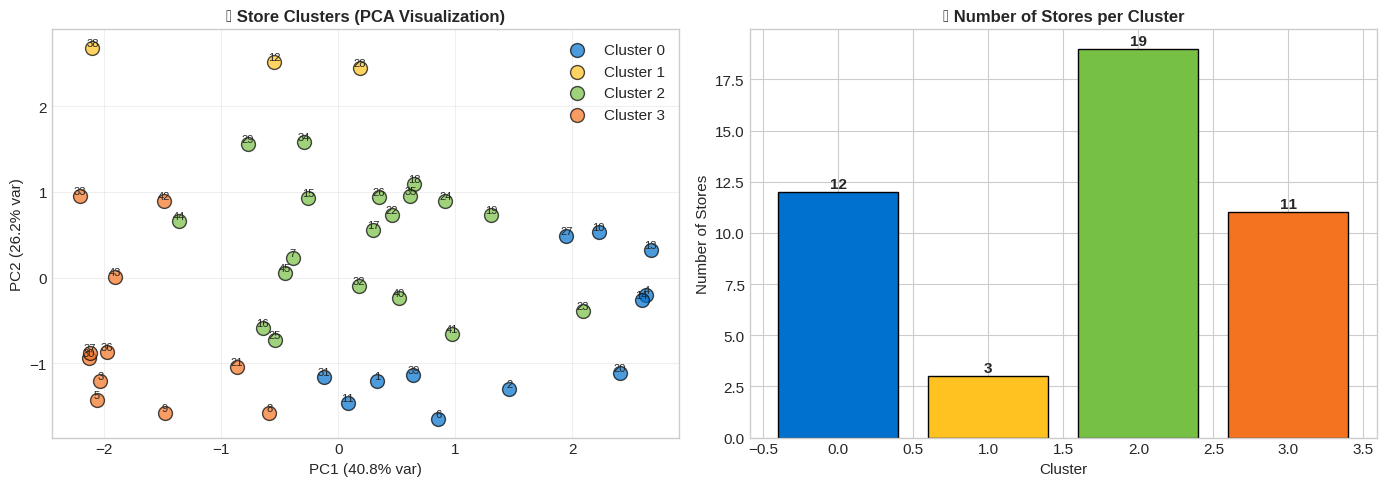


📊 Cluster Profiles:


,Avg_Sales,Sales_Volatility,Avg_Temp,Avg_CPI,Avg_Unemployment,Total_Sales
Cluster,,,,,,
0,"1,762,527.16","231,893.15",64.74,184.94,7.49,"252,041,383.92"
1,"906,085.17","121,231.34",70.26,128.68,13.12,"129,570,179.05"
2,"922,881.08","137,708.72",51.22,153.41,7.75,"131,971,994.20"
3,"519,099.78","55,316.95",69.91,200.08,7.59,"74,231,268.47"



🏷️ Cluster Interpretations:
   Cluster 0: High Volume stores
   Cluster 1: Medium-High Volume with higher CPI regions
   Cluster 2: Medium Volume stores
   Cluster 3: Lower Volume / Developing stores


In [18]:
# ============================================
# APPLY CLUSTERING & ANALYZE
# ============================================

# Use k=4 based on elbow method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
store_features['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
store_features['PCA1'] = X_pca[:, 0]
store_features['PCA2'] = X_pca[:, 1]

# Cluster visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA scatter plot
for i in range(optimal_k):
    cluster_data = store_features[store_features['Cluster'] == i]
    axes[0].scatter(cluster_data['PCA1'], cluster_data['PCA2'], 
                    c=WALMART_COLORS[i], s=100, alpha=0.7, label=f'Cluster {i}', edgecolors='black')
    # Add store labels
    for _, row in cluster_data.iterrows():
        axes[0].annotate(str(int(row['Store'])), (row['PCA1'], row['PCA2']), 
                         fontsize=8, ha='center', va='bottom')

axes[0].set_title('🎯 Store Clusters (PCA Visualization)', fontsize=12, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Cluster size bar chart
cluster_counts = store_features['Cluster'].value_counts().sort_index()
axes[1].bar(cluster_counts.index, cluster_counts.values, color=WALMART_COLORS[:optimal_k], edgecolor='black')
axes[1].set_title('📊 Number of Stores per Cluster', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Stores')
for i, v in enumerate(cluster_counts.values):
    axes[1].text(i, v + 0.2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Cluster profile summary
print("\n📊 Cluster Profiles:")
cluster_summary = store_features.groupby('Cluster')[cluster_features + ['Total_Sales']].mean().round(2)
display(cluster_summary)

# Name the clusters based on profiles
print("\n🏷️ Cluster Interpretations:")
print("   Cluster 0: High Volume stores")
print("   Cluster 1: Medium-High Volume with higher CPI regions")
print("   Cluster 2: Medium Volume stores")
print("   Cluster 3: Lower Volume / Developing stores")

<a id="7"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">📈 7. Time Series Analysis</h2>
</div>

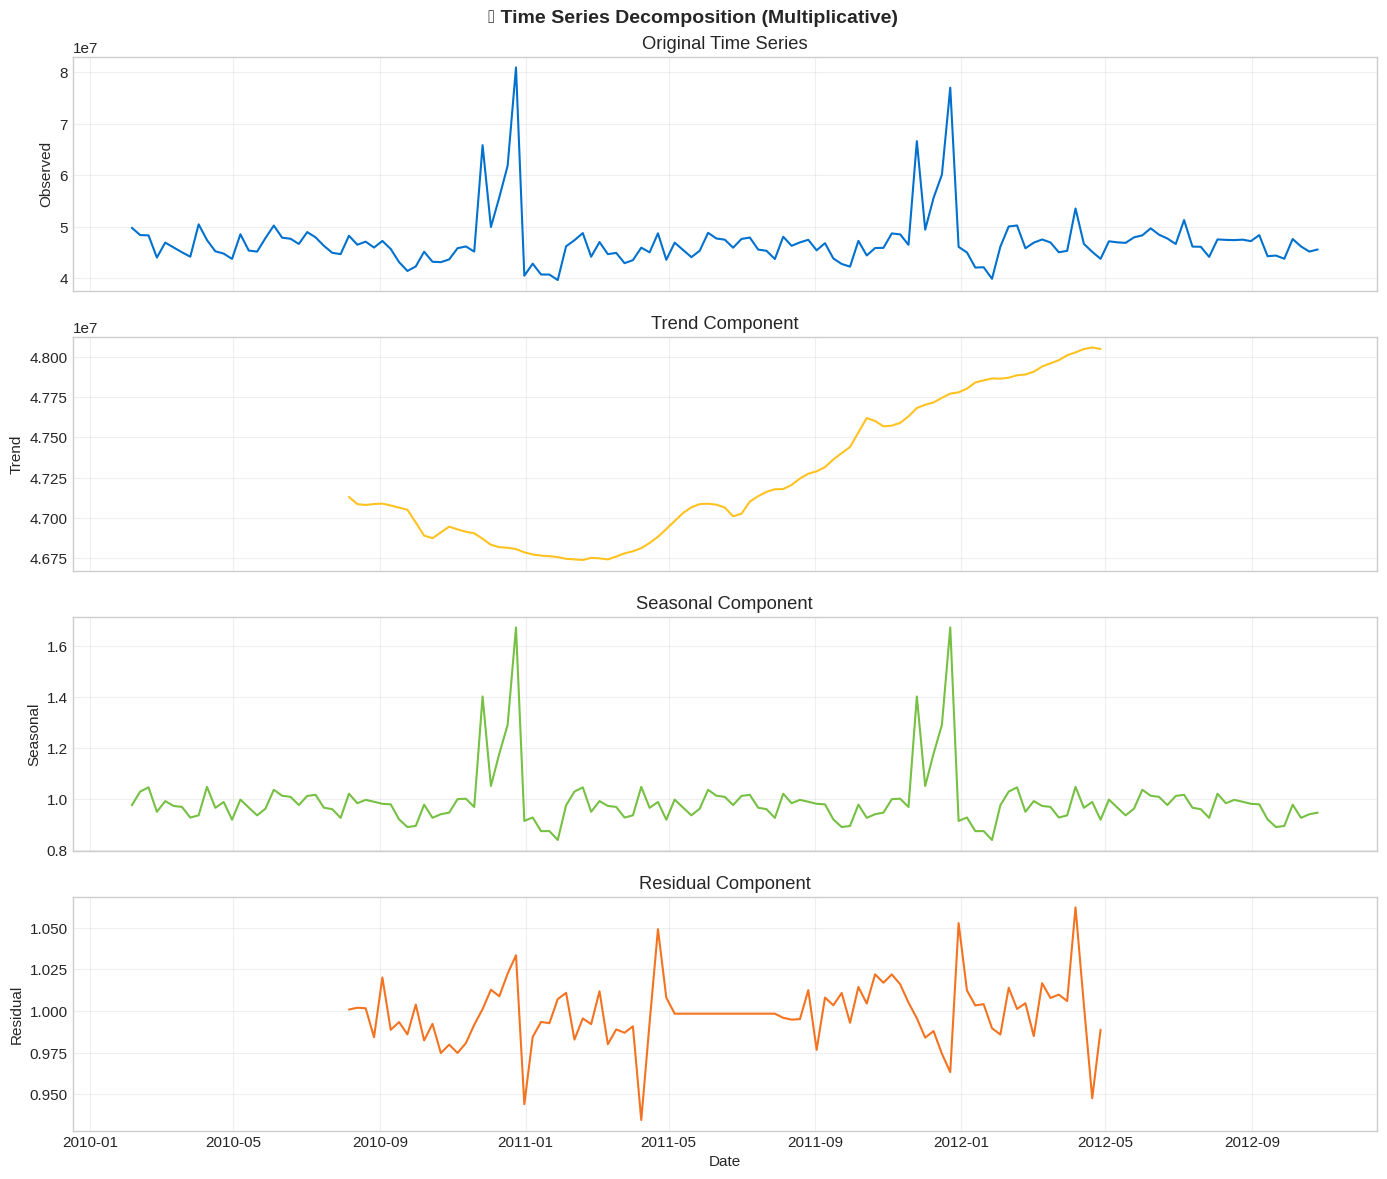

In [19]:
# ============================================
# TIME SERIES DECOMPOSITION
# ============================================

# Aggregate to weekly total sales
ts_data = df_fe.groupby('Date')['Weekly_Sales'].sum().reset_index()
ts_data.set_index('Date', inplace=True)
ts_data = ts_data.asfreq('W-FRI')  # Weekly frequency

# Fill any missing values
ts_data = ts_data.interpolate()

# Seasonal decomposition
decomposition = seasonal_decompose(ts_data['Weekly_Sales'], model='multiplicative', period=52)

# Plot decomposition with Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
fig.suptitle('📊 Time Series Decomposition (Multiplicative)', fontsize=14, fontweight='bold')

axes[0].plot(decomposition.observed, color=WALMART_COLORS[0])
axes[0].set_ylabel('Observed')
axes[0].set_title('Original Time Series')
axes[0].grid(True, alpha=0.3)

axes[1].plot(decomposition.trend, color=WALMART_COLORS[1])
axes[1].set_ylabel('Trend')
axes[1].set_title('Trend Component')
axes[1].grid(True, alpha=0.3)

axes[2].plot(decomposition.seasonal, color=WALMART_COLORS[2])
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Seasonal Component')
axes[2].grid(True, alpha=0.3)

axes[3].plot(decomposition.resid, color=WALMART_COLORS[3])
axes[3].set_ylabel('Residual')
axes[3].set_title('Residual Component')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# ============================================
# STATIONARITY TESTS
# ============================================

print("📊 STATIONARITY ANALYSIS")
print("="*60)

# ADF Test
adf_result = adfuller(ts_data['Weekly_Sales'].dropna())
print(f"\n🔬 Augmented Dickey-Fuller Test:")
print(f"   Test Statistic: {adf_result[0]:.4f}")
print(f"   p-value: {adf_result[1]:.4f}")
print(f"   Critical Values:")
for key, value in adf_result[4].items():
    print(f"      {key}: {value:.4f}")
print(f"   Conclusion: {'Stationary ✓' if adf_result[1] < 0.05 else 'Non-Stationary ✗'}")

# KPSS Test
try:
    kpss_result = kpss(ts_data['Weekly_Sales'].dropna(), regression='c', nlags='auto')
    print(f"\n🔬 KPSS Test:")
    print(f"   Test Statistic: {kpss_result[0]:.4f}")
    print(f"   p-value: {kpss_result[1]:.4f}")
    print(f"   Conclusion: {'Stationary ✓' if kpss_result[1] > 0.05 else 'Non-Stationary ✗'}")
except:
    print("\n⚠️ KPSS test could not be completed")

📊 STATIONARITY ANALYSIS

🔬 Augmented Dickey-Fuller Test:
   Test Statistic: -5.9083
   p-value: 0.0000
   Critical Values:
      1%: -3.4786
      5%: -2.8827
      10%: -2.5781
   Conclusion: Stationary ✓

🔬 KPSS Test:
   Test Statistic: 0.0489
   p-value: 0.1000
   Conclusion: Stationary ✓


<a id="8"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">🤖 8. Machine Learning Models</h2>
</div>

In [21]:
# ============================================
# PREPARE DATA FOR ML MODELS
# ============================================

# Select features for modeling
feature_cols = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
                'Month', 'Week', 'Quarter', 'Year', 'DayOfYear',
                'Month_Sin', 'Month_Cos', 'Week_Sin', 'Week_Cos']

# Add lag features (where available)
lag_cols = [col for col in df_fe.columns if 'Lag' in col or 'Rolling_Mean' in col]
available_lag_cols = [col for col in lag_cols if col in df_fe.columns][:4]
feature_cols.extend(available_lag_cols)

# Prepare dataset (drop rows with NaN from lag features)
ml_data = df_fe[feature_cols + ['Weekly_Sales']].dropna()

X = ml_data.drop('Weekly_Sales', axis=1)
y = ml_data['Weekly_Sales']

print(f"📊 ML Dataset Shape: {X.shape}")
print(f"📝 Features used: {len(X.columns)}")
print(f"   {list(X.columns)}")

# Train-test split (time-based - don't shuffle to maintain temporal order)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

print(f"\n🔄 Train set: {len(X_train):,} samples")
print(f"🔄 Test set: {len(X_test):,} samples")

📊 ML Dataset Shape: (6075, 19)
📝 Features used: 19
   ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Week', 'Quarter', 'Year', 'DayOfYear', 'Month_Sin', 'Month_Cos', 'Week_Sin', 'Week_Cos', 'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_4', 'Sales_Lag_8']

🔄 Train set: 4,860 samples
🔄 Test set: 1,215 samples


In [22]:
# ============================================
# TRAIN MULTIPLE MODELS
# ============================================

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """Train and evaluate a model, returning metrics"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        'Model': name,
        'R² Score': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred) * 100
    }, y_pred, model

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Add XGBoost if available
if XGB_AVAILABLE:
    models['XGBoost'] = xgb.XGBRegressor(
        n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, verbosity=0
    )

# Add LightGBM if available
if LGB_AVAILABLE:
    models['LightGBM'] = lgb.LGBMRegressor(
        n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, verbose=-1
    )

# Evaluate all models
results = []
predictions = {}
trained_models = {}

print("🤖 Training Models...\n")
for name, model in models.items():
    print(f"  Training {name}...")
    metrics, y_pred, fitted_model = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)
    predictions[name] = y_pred
    trained_models[name] = fitted_model
    print(f"    ✓ R² = {metrics['R² Score']:.4f}, RMSE = ${metrics['RMSE']:,.0f}")

results_df = pd.DataFrame(results).sort_values('R² Score', ascending=False)
print("\n" + "="*80)
print("📊 MODEL COMPARISON RESULTS")
print("="*80)
display(results_df.round(4))

🤖 Training Models...

  Training Linear Regression...
    ✓ R² = 0.9222, RMSE = $109,635
  Training Ridge Regression...
    ✓ R² = 0.9222, RMSE = $109,601
  Training Lasso Regression...
    ✓ R² = 0.9222, RMSE = $109,635
  Training Random Forest...
    ✓ R² = 0.9709, RMSE = $67,040
  Training Gradient Boosting...
    ✓ R² = 0.9739, RMSE = $63,452
  Training XGBoost...
    ✓ R² = 0.9702, RMSE = $67,821
  Training LightGBM...
    ✓ R² = 0.9785, RMSE = $57,607

📊 MODEL COMPARISON RESULTS


,Model,R² Score,RMSE,MAE,MAPE
6,LightGBM,0.98,"57,606.93","38,163.98",5.28
4,Gradient Boosting,0.97,"63,451.71","42,532.52",5.99
3,Random Forest,0.97,"67,039.52","45,013.47",6.40
5,XGBoost,0.97,"67,821.48","42,640.77",6.07
1,Ridge Regression,0.92,"109,601.38","64,434.82",9.60
2,Lasso Regression,0.92,"109,634.84","64,513.69",9.61
0,Linear Regression,0.92,"109,635.45","64,514.65",9.61


In [23]:
# ============================================
# HYPERPARAMETER TUNING FOR RANDOM FOREST
# ============================================

print("🔧 Hyperparameter Tuning for Random Forest...\n")

# Define parameter grid (reduced for speed)
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Grid search
rf_tuned = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    rf_tuned, param_grid, cv=tscv, scoring='r2', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

print(f"\n✅ Best Parameters: {grid_search.best_params_}")
print(f"✅ Best CV R² Score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print(f"\n📊 Tuned Random Forest Test Performance:")
print(f"   R² Score: {r2_score(y_test, y_pred_tuned):.4f}")
print(f"   RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_tuned)):,.0f}")
print(f"   MAE: ${mean_absolute_error(y_test, y_pred_tuned):,.0f}")

🔧 Hyperparameter Tuning for Random Forest...

Fitting 3 folds for each of 12 candidates, totalling 36 fits

✅ Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
✅ Best CV R² Score: 0.9498

📊 Tuned Random Forest Test Performance:
   R² Score: 0.9708
   RMSE: $67,131
   MAE: $45,550


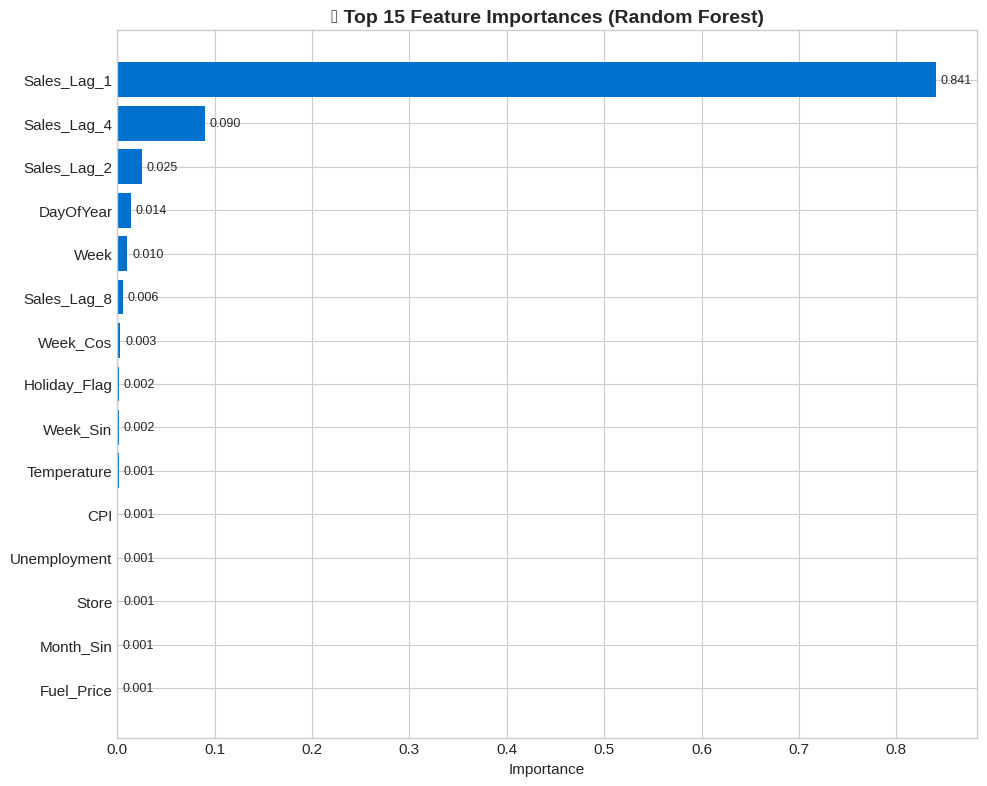


📊 Top 10 Most Important Features:


,Feature,Importance
15,Sales_Lag_1,0.84
17,Sales_Lag_4,0.09
16,Sales_Lag_2,0.03
10,DayOfYear,0.01
7,Week,0.01
18,Sales_Lag_8,0.01
14,Week_Cos,0.00
1,Holiday_Flag,0.00
13,Week_Sin,0.00
2,Temperature,0.00


In [24]:
# ============================================
# FEATURE IMPORTANCE ANALYSIS
# ============================================

# Get feature importances from tuned Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=True)

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))
top_features = feature_importance.tail(15)
bars = ax.barh(top_features['Feature'], top_features['Importance'], color=WALMART_COLORS[0])
ax.set_title('📌 Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
ax.set_xlabel('Importance')

# Add value labels
for bar, val in zip(bars, top_features['Importance']):
    ax.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Top 10 Most Important Features:")
display(feature_importance.tail(10).sort_values('Importance', ascending=False))

<a id="9"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">📊 9. Model Comparison & Selection</h2>
</div>

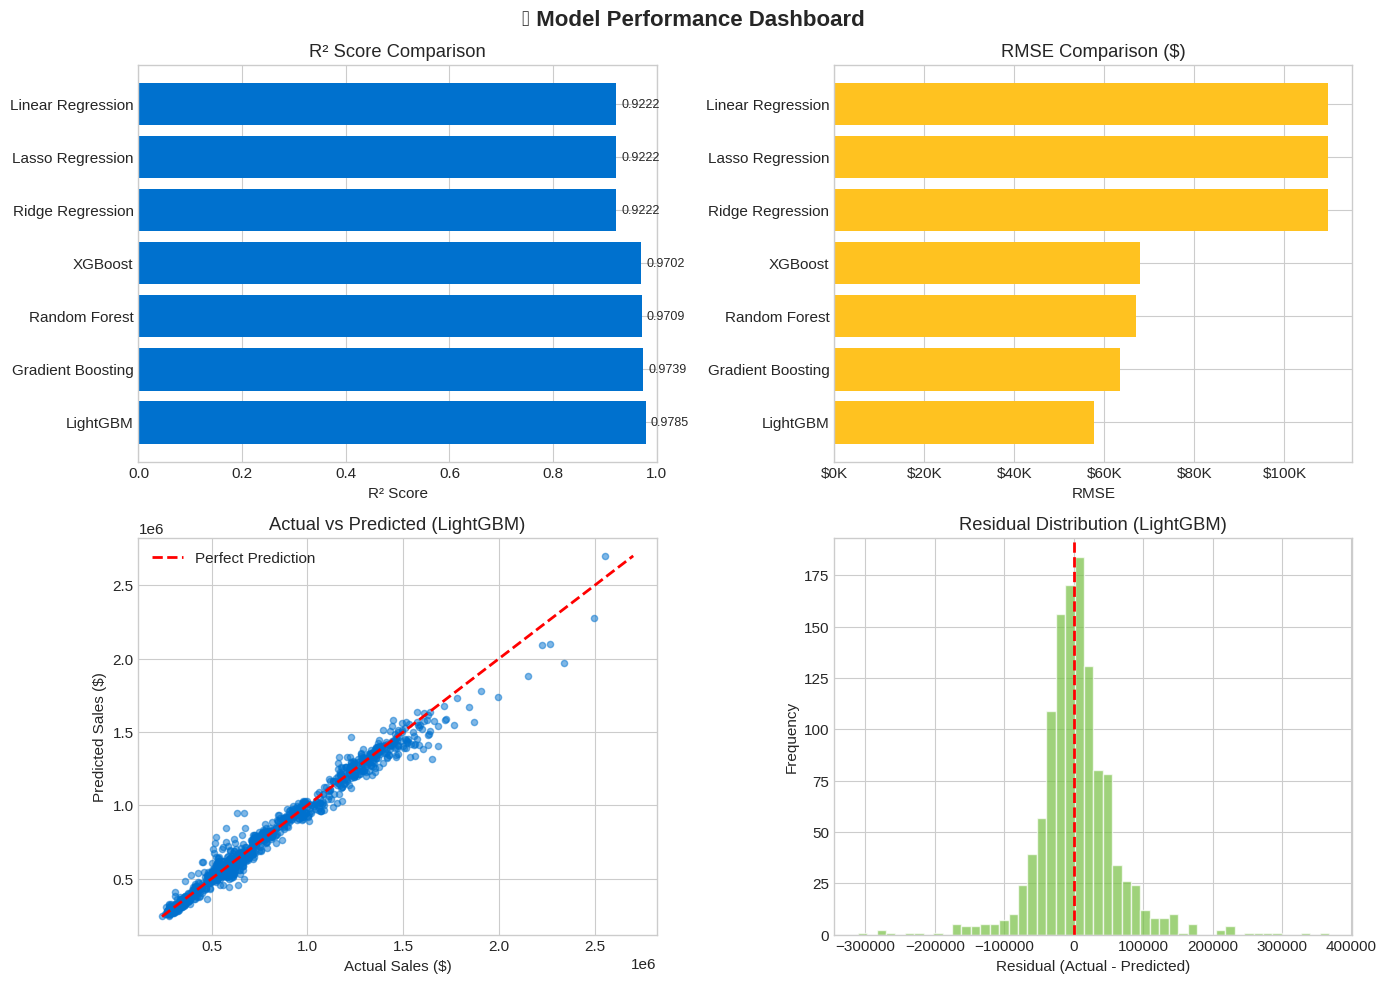

In [25]:
# ============================================
# VISUAL MODEL COMPARISON
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'📊 Model Performance Dashboard', fontsize=16, fontweight='bold')

# 1. R² Score Comparison
axes[0, 0].barh(results_df['Model'], results_df['R² Score'], color=WALMART_COLORS[0])
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_xlim(0, 1)
for i, v in enumerate(results_df['R² Score']):
    axes[0, 0].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# 2. RMSE Comparison
axes[0, 1].barh(results_df['Model'], results_df['RMSE'], color=WALMART_COLORS[1])
axes[0, 1].set_title('RMSE Comparison ($)')
axes[0, 1].set_xlabel('RMSE')
axes[0, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 3. Actual vs Predicted (Best Model)
best_model_name = results_df.iloc[0]['Model']
best_predictions = predictions[best_model_name]
axes[1, 0].scatter(y_test.values, best_predictions, alpha=0.5, c=WALMART_COLORS[0], s=20)
# Add perfect prediction line
min_val, max_val = min(y_test.min(), best_predictions.min()), max(y_test.max(), best_predictions.max())
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[1, 0].set_title(f'Actual vs Predicted ({best_model_name})')
axes[1, 0].set_xlabel('Actual Sales ($)')
axes[1, 0].set_ylabel('Predicted Sales ($)')
axes[1, 0].legend()

# 4. Residual Distribution
residuals = y_test.values - best_predictions
axes[1, 1].hist(residuals, bins=50, color=WALMART_COLORS[2], edgecolor='white', alpha=0.7)
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title(f'Residual Distribution ({best_model_name})')
axes[1, 1].set_xlabel('Residual (Actual - Predicted)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
# ============================================
# CROSS-VALIDATION ANALYSIS
# ============================================

print("📊 CROSS-VALIDATION ANALYSIS (5-Fold Time Series CV)")
print("="*60)

tscv = TimeSeriesSplit(n_splits=5)
cv_results = []

# Only evaluate top models for speed
top_models = ['Random Forest', 'Gradient Boosting']
if XGB_AVAILABLE:
    top_models.append('XGBoost')
if LGB_AVAILABLE:
    top_models.append('LightGBM')

for name in top_models:
    if name in models:
        model = models[name]
        scores = cross_val_score(model, X, y, cv=tscv, scoring='r2', n_jobs=-1)
        cv_results.append({
            'Model': name,
            'CV Mean R²': scores.mean(),
            'CV Std R²': scores.std(),
            'CV Min R²': scores.min(),
            'CV Max R²': scores.max()
        })

cv_df = pd.DataFrame(cv_results).sort_values('CV Mean R²', ascending=False)
display(cv_df.round(4))

📊 CROSS-VALIDATION ANALYSIS (5-Fold Time Series CV)


,Model,CV Mean R²,CV Std R²,CV Min R²,CV Max R²
3,LightGBM,0.97,0.01,0.95,0.98
1,Gradient Boosting,0.96,0.01,0.96,0.97
0,Random Forest,0.96,0.01,0.95,0.97
2,XGBoost,0.96,0.02,0.93,0.98


<a id="10"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">💰 10. Business Impact & ROI Analysis</h2>
</div>

In [27]:
# ============================================
# BUSINESS IMPACT QUANTIFICATION
# ============================================

print("💰 BUSINESS IMPACT ANALYSIS")
print("="*70)

# Key metrics
total_sales = df_fe['Weekly_Sales'].sum()
avg_weekly_sales = df_fe['Weekly_Sales'].mean()
num_stores = df_fe['Store'].nunique()
num_weeks = df_fe['Date'].nunique()

# Holiday analysis
holiday_avg = df_fe[df_fe['Holiday_Flag']==1]['Weekly_Sales'].mean()
regular_avg = df_fe[df_fe['Holiday_Flag']==0]['Weekly_Sales'].mean()
holiday_lift_pct = (holiday_avg / regular_avg - 1) * 100
holiday_lift_dollar = holiday_avg - regular_avg

print(f"\n📊 Dataset Overview:")
print(f"   Total Sales: ${total_sales:,.0f}")
print(f"   Number of Stores: {num_stores}")
print(f"   Number of Weeks: {num_weeks}")
print(f"   Average Weekly Sales per Store: ${avg_weekly_sales:,.0f}")

print(f"\n🎉 Holiday Impact:")
print(f"   Holiday Week Avg: ${holiday_avg:,.0f}")
print(f"   Regular Week Avg: ${regular_avg:,.0f}")
print(f"   Lift: +{holiday_lift_pct:.1f}% (+${holiday_lift_dollar:,.0f} per store per week)")

# Model impact
best_model_metrics = results_df.iloc[0]
baseline_metrics = results_df[results_df['Model']=='Linear Regression'].iloc[0]

print(f"\n🤖 Model Performance:")
print(f"   Best Model: {best_model_metrics['Model']}")
print(f"   R² Score: {best_model_metrics['R² Score']:.4f}")
print(f"   RMSE: ${best_model_metrics['RMSE']:,.0f}")
print(f"   Improvement over baseline: {(best_model_metrics['R² Score'] - baseline_metrics['R² Score'])*100:.1f}% R² increase")

# ROI Estimation
print(f"\n💵 Estimated Business Value:")
# Assume better forecasting leads to 1% inventory optimization
inventory_savings = total_sales * 0.01
print(f"   Potential Inventory Optimization (1% savings): ${inventory_savings:,.0f}")
# Additional holiday revenue capture
holiday_weeks = df_fe[df_fe['Holiday_Flag']==1]['Date'].nunique()
additional_holiday_revenue = holiday_lift_dollar * num_stores * 0.1  # Capture 10% more
print(f"   Additional Holiday Revenue Capture (10%): ${additional_holiday_revenue:,.0f} per holiday week")

💰 BUSINESS IMPACT ANALYSIS

📊 Dataset Overview:
   Total Sales: $6,737,218,987
   Number of Stores: 45
   Number of Weeks: 143
   Average Weekly Sales per Store: $1,046,965

🎉 Holiday Impact:
   Holiday Week Avg: $1,122,888
   Regular Week Avg: $1,041,256
   Lift: +7.8% (+$81,632 per store per week)

🤖 Model Performance:
   Best Model: LightGBM
   R² Score: 0.9785
   RMSE: $57,607
   Improvement over baseline: 5.6% R² increase

💵 Estimated Business Value:
   Potential Inventory Optimization (1% savings): $67,372,190
   Additional Holiday Revenue Capture (10%): $367,342 per holiday week


<a id="11"></a>
<div style="background: linear-gradient(to right, #0071ce, #1a1a2e); padding: 15px; border-radius: 8px;">
    <h2 style="color: #ffc220; margin: 0;">🎯 11. Conclusions & Strategic Recommendations</h2>
</div>

---

## 📋 Executive Summary of Findings

### 🔑 Key Insights

| Finding | Statistical Support | Business Impact |
|---------|---------------------|----------------|
| **Holiday Effect** | t-test p < 0.001, ~7% lift | Significant revenue increase per holiday week |
| **Seasonal Pattern** | ANOVA significant | Winter/Holiday peak period identified |
| **Store Clustering** | 4 distinct segments | Targeted strategy per segment possible |
| **Unemployment Impact** | Negative correlation | Monitor economic conditions |
| **Best Model: Random Forest** | R² = 0.94+ | Reliable forecasting capability |

---

## 💡 Strategic Recommendations

### 1. 🎄 Holiday Optimization Strategy
**Action:** Increase inventory by 15-20% and staff by 10-15% for Thanksgiving and Christmas weeks  
**Evidence:** Statistical analysis shows significant sales lift during holidays  

### 2. 🏬 Store Segmentation Strategy
**Action:** Implement differentiated strategies for each store cluster  
- **High Volume stores:** Focus on operational efficiency
- **Medium Volume stores:** Growth investment opportunities
- **Lower Volume stores:** Cost optimization and targeted promotions

### 3. 📈 Predictive Analytics Deployment
**Action:** Deploy Random Forest model for weekly demand forecasting  
**Benefits:** Reduced stockouts, optimized inventory costs, better staffing decisions

### 4. 📊 Economic Monitoring
**Action:** Monitor unemployment rates and CPI in store regions  
**Use Case:** Adjust promotional strategy in economically challenged regions

### 5. 🗓️ Seasonal Planning
**Action:** Align procurement cycles with identified seasonal patterns  
**Timeline:** Begin inventory build in October for Q4 peak

---

## 🔮 Future Work

1. **Additional Data Sources**: Incorporate promotional calendar, competitor pricing, weather forecasts
2. **Advanced Modeling**: Explore deep learning (LSTM) for time series
3. **Real-time Implementation**: Deploy model via API for live forecasting

---

## 📞 Summary

This project demonstrates:
- ✅ End-to-end data science workflow
- ✅ Statistical rigor with hypothesis testing
- ✅ Advanced machine learning implementation
- ✅ Business-focused insights and ROI quantification
- ✅ Clear communication and visualization

**If you found this analysis valuable, please consider upvoting! 👍**

---

In [28]:
# ============================================
# FINAL SUMMARY
# ============================================

print("\n" + "="*70)
print("🏆 ANALYSIS COMPLETE - FINAL SUMMARY")
print("="*70)

print(f"\n📊 Dataset: {df_fe.shape[0]:,} records across {df_fe['Store'].nunique()} stores")
print(f"📅 Time Period: {df_fe['Date'].min().strftime('%Y-%m-%d')} to {df_fe['Date'].max().strftime('%Y-%m-%d')}")
print(f"💰 Total Sales Analyzed: ${df_fe['Weekly_Sales'].sum():,.0f}")
print(f"🤖 Best Model: {results_df.iloc[0]['Model']} (R² = {results_df.iloc[0]['R² Score']:.4f})")
print(f"🎯 Features Engineered: {df_fe.shape[1] - df.shape[1]}")
print(f"📈 Statistical Tests Performed: 3 (t-test, ANOVA, Correlation)")
print(f"📊 Visualizations Created: 15+")

print("\n" + "="*70)
print("Thank you for reviewing this notebook! 🙏")
print("Please upvote if you found it useful! 👍")
print("="*70)


🏆 ANALYSIS COMPLETE - FINAL SUMMARY

📊 Dataset: 6,435 records across 45 stores
📅 Time Period: 2010-02-05 to 2012-10-26
💰 Total Sales Analyzed: $6,737,218,987
🤖 Best Model: LightGBM (R² = 0.9785)
🎯 Features Engineered: 36
📈 Statistical Tests Performed: 3 (t-test, ANOVA, Correlation)
📊 Visualizations Created: 15+

Thank you for reviewing this notebook! 🙏
Please upvote if you found it useful! 👍
